## High Pass Filter In Frequency Domain

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

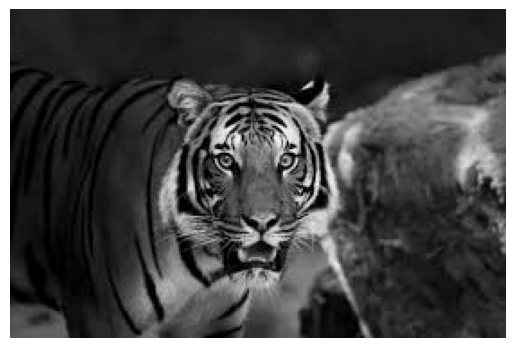

In [2]:
plt.imshow(image, cmap='gray')
plt.axis("off")
row, col = image.shape

In [3]:
def centering(image):
  # new_image = image.astype(np.int16)
  # for i in range(row):
  #     for j in range(col):
  #       new_image[i][j] = new_image[i][j] * ((-1) ** (i+j))

  new_image = np.fft.fftshift(image)
  return new_image
# This is not working 


## High Pass Filter

In [4]:
D = np.zeros((row, col))
for i in range(row):
    for j in range(col):
        D[i][j] = np.sqrt((i - row/2) ** 2 + (j - col/2) ** 2)

In [5]:
def dft2d(image):
    F_uv=np.fft.fft2(image)
    return F_uv

### Ideal HPF

In [6]:
def high_pass_filter(image, D0):
    M, N = image.shape

    dft_shifted = np.fft.fftshift(np.fft.fft2(image))

    # ideal low pass filter
    for u in range(M):
        for v in range(N):
            if D[u, v] < D0:
                dft_shifted[u, v] = 0
    ideal_result = np.real(np.fft.ifft2(np.fft.ifftshift(dft_shifted)))
    return np.abs(ideal_result)

(np.float64(-0.5), np.float64(275.5), np.float64(182.5), np.float64(-0.5))

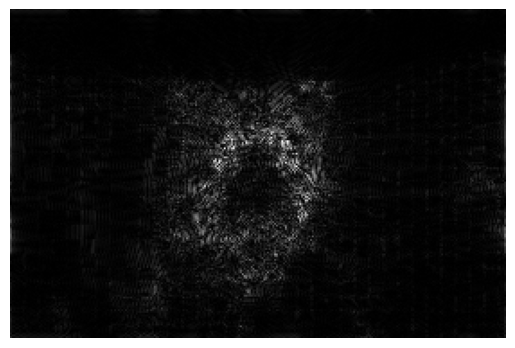

In [8]:
D0 = 70
low_pass_filtered = high_pass_filter(image, D0)

plt.imshow(low_pass_filtered, cmap='gray')
plt.axis("off")

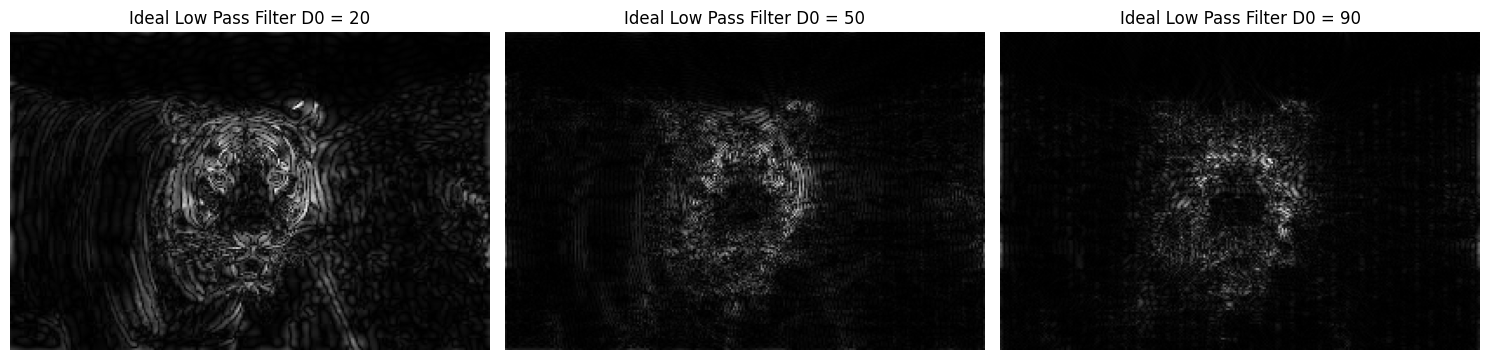

In [9]:
d0 = [20, 50, 90]
fig, axs = plt.subplots(1, len(d0), figsize=(15, 5))
for idx, d in enumerate(d0):
    low_pass_filtered = high_pass_filter(image, d)
    axs[idx].imshow(low_pass_filtered, cmap='gray')
    axs[idx].axis("off")
    axs[idx].set_title(f'Ideal Low Pass Filter D0 = {d}')

plt.tight_layout()
plt.show()

### Butterworth HPF

In [10]:
def butterworth_high_pass_filter(image, D0, n):
    M, N = image.shape

    dft_shifted = np.fft.fftshift(np.fft.fft2(image))

    # butterworth low pass filter
    for u in range(M):
        for v in range(N):
            d = D[u, v]
            dft_shifted[u, v] = 1 / (1 + (D0 / d) ** (2 * n)) * dft_shifted[u, v]
            
    butterworth_result = np.real(np.fft.ifft2(np.fft.ifftshift(dft_shifted)))
    return np.abs(butterworth_result)

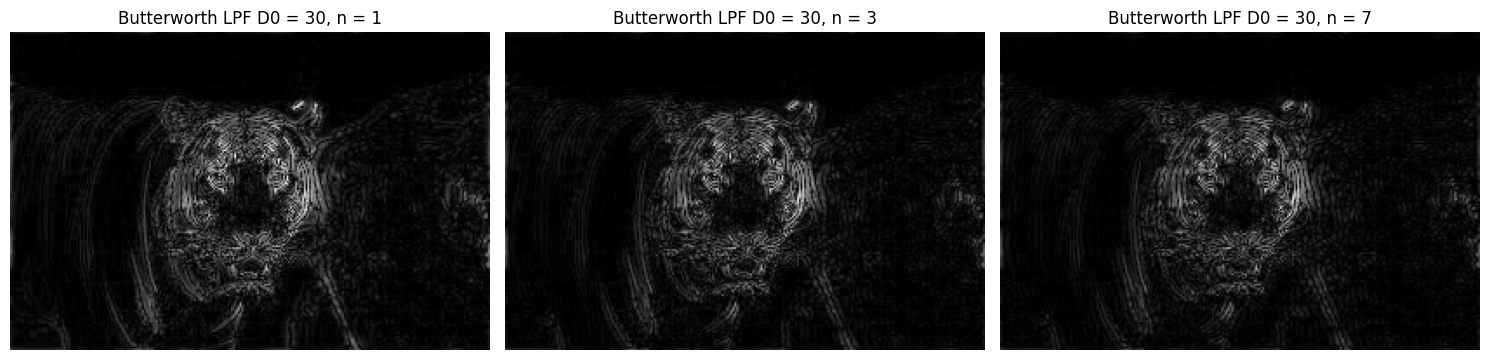

In [14]:
d0 = 30
n = [1, 3, 7]

fig, axs = plt.subplots(1, len(n), figsize=(15, 5))

for idx, i in enumerate(n):
    butterworth_filtered = butterworth_high_pass_filter(image, d0, i)
    
    axs[idx].imshow(butterworth_filtered, cmap='gray')
    axs[idx].axis("off")
    axs[idx].set_title(f'Butterworth LPF D0 = {d0}, n = {i}')

plt.tight_layout()
plt.show()


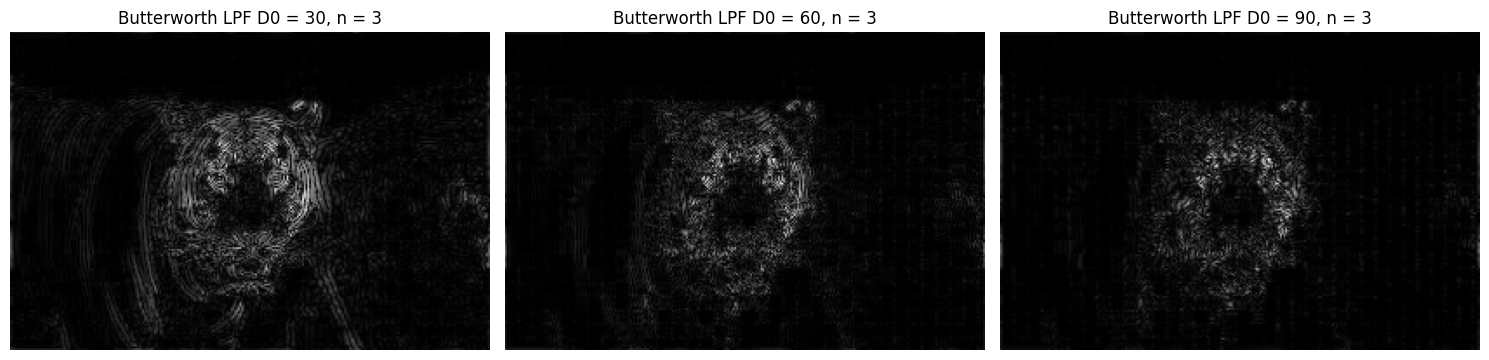

In [15]:
d0 = [30, 60, 90]
n = 3
fig, axs = plt.subplots(1, len(d0), figsize=(15, 5))

for idx, i in enumerate(d0):
    butterworth_filtered = butterworth_high_pass_filter(image, i, n)
    
    axs[idx].imshow(butterworth_filtered, cmap='gray')
    axs[idx].axis("off")
    axs[idx].set_title(f'Butterworth LPF D0 = {i}, n = {n}')

plt.tight_layout()
plt.show()


### Gaussian HPF

In [22]:
def gaussian_high_pass_filter(image, D0):
    M, N = image.shape

    dft_shifted = np.fft.fftshift(np.fft.fft2(image))

    # gaussian low pass filter
    for u in range(M):
        for v in range(N):
            d = D[u, v]
            dft_shifted[u, v] =( 1 - np.exp(- (d ** 2) / (2 * D0 ** 2))) * dft_shifted[u, v]
            
    gaussian_result = np.real(np.fft.ifft2(np.fft.ifftshift(dft_shifted)))
    return np.abs(gaussian_result)

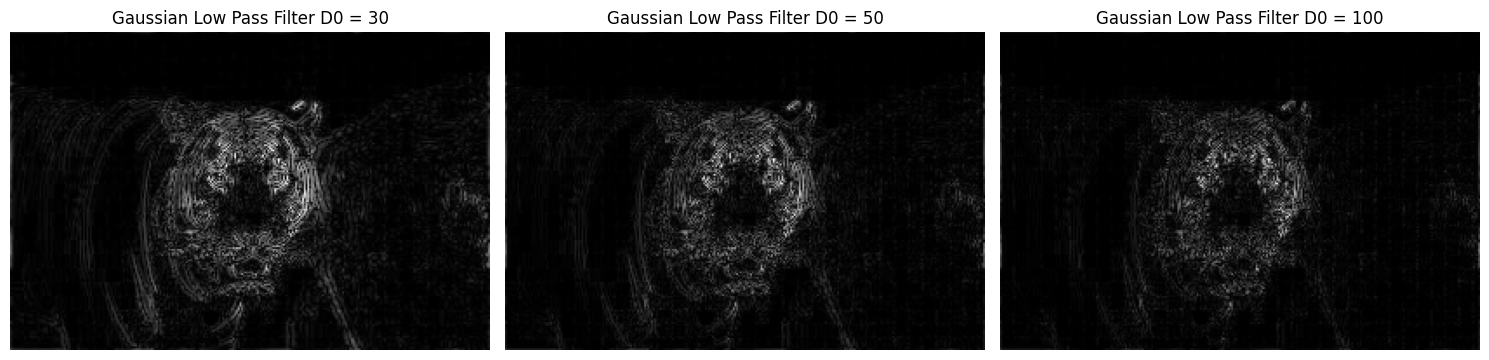

In [23]:
d0 = [30, 50, 100]
fig, axs = plt.subplots(1, len(d0), figsize=(15, 5))
for idx, d in enumerate(d0):
    gaussian_filtered = gaussian_high_pass_filter(image, d)
    axs[idx].imshow(gaussian_filtered, cmap='gray')
    axs[idx].axis("off")
    axs[idx].set_title(f'Gaussian Low Pass Filter D0 = {d}')

plt.tight_layout()
plt.show()